# Coplanar Double Pendulum Equations of Motion

Uncomment and evaluate the next cell to install tikzmagic in Google Colab


In [4]:
#!apt update
#!apt install imagemagick
#!apt install pdf2svg
#!apt-get install pdflatex
#!apt-get install texlive-latex-recommended
#!apt install texlive texlive-latex-extra
#!pip install git+https://github.com/mkrphys/ipython-tikzmagic.git

# Diagram

In [3]:
%load_ext tikzmagic

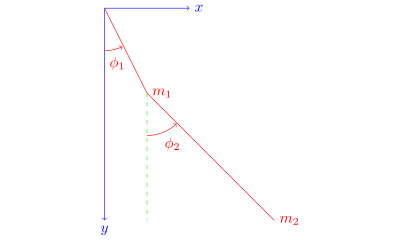

In [5]:
%%tikz  -S test_output.tikz -f svg
\draw[->,blue] (0,0) -- (2,0)node[right]{$x$} ;
\draw[->,blue] (0,0) -- (0,-5)node[below]{$y$} ;
\draw[-,red] (0,0) -- (1,-2)node[right]{$m_1$};
\draw[-,red] (1,-2) -- (4,-5)node[right]{$m_2$};
\draw[->,red] (0,-1) arc (270:295:1);
\node[red] at (0.3,-1.3) {$\phi_1$};
\draw[dashed,green] (1,-2) -- (1,-5);
\draw[->,red] (1,-3) arc (270:314:1);
\node[red] at (1.6,-3.2) {$\phi_2$};

##Preamble

In [6]:
from sympy import symbols, Function, sin, cos, Rational, diff, simplify
from sympy.physics.mechanics import init_vprinting
init_vprinting()

Symbolic variables

In [7]:
t,l1,l2,m1,m2,g=symbols('t,l1,l2,m1,m2,g',positive=True)

Generalized coordinates

In [8]:
phi1,phi2=Function('phi1')(t),Function('phi2')(t)

Cartesian Coordinates

In [9]:
x1=l1*sin(phi1)
x2=l1*sin(phi1)+l2*sin(phi2)
y1=l1*cos(phi1)
y2=l1*cos(phi1)+l2*cos(phi2)

## Kinetic Energy $T$

In [10]:
T=(Rational(1,2)*m1*((x1.diff(t))**2+(y1.diff(t))**2)+Rational(1,2)*m2*((x2.diff(t))**2+(y2.diff(t))**2)).simplify()
T

                  2      ⎛               2                                    
  2    ⎛d        ⎞       ⎜  2 ⎛d        ⎞                               d     
l₁ ⋅m₁⋅⎜──(φ₁(t))⎟    m₂⋅⎜l₁ ⋅⎜──(φ₁(t))⎟  + 2⋅l₁⋅l₂⋅cos(φ₁(t) - φ₂(t))⋅──(φ₁(
       ⎝dt       ⎠       ⎝    ⎝dt       ⎠                               dt    
─────────────────── + ────────────────────────────────────────────────────────
         2                                                        2           

                               2⎞
    d             2 ⎛d        ⎞ ⎟
t))⋅──(φ₂(t)) + l₂ ⋅⎜──(φ₂(t))⎟ ⎟
    dt              ⎝dt       ⎠ ⎠
─────────────────────────────────
                                 

## Potential Energy $U$ (notice that $y$ increases downwards)

In [11]:
U=(-m1*g*y1-m2*g*y2).simplify()
U

-g⋅(l₁⋅m₁⋅cos(φ₁(t)) + l₁⋅m₂⋅cos(φ₁(t)) + l₂⋅m₂⋅cos(φ₂(t)))

## Lagrangian $L=T-U$

In [12]:
Lag=(T-U).simplify()
Lag

                                                                              
                                                               2    ⎛d        
                                                             l₁ ⋅m₁⋅⎜──(φ₁(t))
                                                                    ⎝dt       
g⋅(l₁⋅m₁⋅cos(φ₁(t)) + l₁⋅m₂⋅cos(φ₁(t)) + l₂⋅m₂⋅cos(φ₂(t))) + ─────────────────
                                                                      2       

 2      ⎛               2                                                     
⎞       ⎜  2 ⎛d        ⎞                               d         d            
⎟    m₂⋅⎜l₁ ⋅⎜──(φ₁(t))⎟  + 2⋅l₁⋅l₂⋅cos(φ₁(t) - φ₂(t))⋅──(φ₁(t))⋅──(φ₂(t)) + l
⎠       ⎝    ⎝dt       ⎠                               dt        dt           
── + ─────────────────────────────────────────────────────────────────────────
                                                 2                            

              2⎞
 2 ⎛d        ⎞ ⎟
₂ ⋅⎜──(φ₂(t))⎟ ⎟

## Euler-Lagrange Equations of Motion $\frac{d}{dt}\left(\frac{\partial{L}}{\partial{\dot{q}_i}}\right)-\frac{\partial{L}}{\partial{q_i}}=0$

In [13]:
def EOM(L,q):
  return simplify(diff(diff(L,diff(q,t)),t)-diff(L,q)).expand()

In [14]:
EOM(Lag,phi1)

                                                   2                   2      
                                            2     d             2     d       
g⋅l₁⋅m₁⋅sin(φ₁(t)) + g⋅l₁⋅m₂⋅sin(φ₁(t)) + l₁ ⋅m₁⋅───(φ₁(t)) + l₁ ⋅m₂⋅───(φ₁(t)
                                                   2                   2      
                                                 dt                  dt       

                                           2                                 2
                                ⎛d        ⎞                                 d 
) + l₁⋅l₂⋅m₂⋅sin(φ₁(t) - φ₂(t))⋅⎜──(φ₂(t))⎟  + l₁⋅l₂⋅m₂⋅cos(φ₁(t) - φ₂(t))⋅───
                                ⎝dt       ⎠                                  2
                                                                           dt 

       
       
(φ₂(t))
       
       

In [15]:
EOM(Lag,phi2)

                                                            2                 
                                                 ⎛d        ⎞                  
g⋅l₂⋅m₂⋅sin(φ₂(t)) - l₁⋅l₂⋅m₂⋅sin(φ₁(t) - φ₂(t))⋅⎜──(φ₁(t))⎟  + l₁⋅l₂⋅m₂⋅cos(φ
                                                 ⎝dt       ⎠                  
                                                                              

                2                   2       
               d             2     d        
₁(t) - φ₂(t))⋅───(φ₁(t)) + l₂ ⋅m₂⋅───(φ₂(t))
                2                   2       
              dt                  dt        